In [33]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean


df_no_temp = pd.read_csv('../data/RFID_DATA_SET_NOTEMP_CLEANED.csv')
df_temp = pd.read_csv('../data/RFID_DATA_SET_TEMP_CLEANED.csv')

# df_no_temp2 = df_no_temp[['Distance','RSSI','Detect']]
# no_temp_dist_group = df_no_temp2.groupby('Distance')
# no_temp_dist10 = no_temp_dist_group.get_group(10)
# no_temp_dist20 = no_temp_dist_group.get_group(20)
# no_temp_dist30 = no_temp_dist_group.get_group(30)
# no_temp_dist40 = no_temp_dist_group.get_group(40)
# no_temp_dist50 = no_temp_dist_group.get_group(50)
# no_temp_dist60 = no_temp_dist_group.get_group(60)
# no_temp_dist70 = no_temp_dist_group.get_group(70)
# no_temp_dist80 = no_temp_dist_group.get_group(80)
# no_temp_dist90 = no_temp_dist_group.get_group(90)
# no_temp_dist100 = no_temp_dist_group.get_group(100)
# no_temp_dist110 = no_temp_dist_group.get_group(110)
# no_temp_dist120 = no_temp_dist_group.get_group(120)
# no_temp_dist130 = no_temp_dist_group.get_group(130)
# no_temp_dist140 = no_temp_dist_group.get_group(140)
# no_temp_dist150 = no_temp_dist_group.get_group(150)
# no_temp_dist160 = no_temp_dist_group.get_group(160)
# no_temp_dist170 = no_temp_dist_group.get_group(170)
# no_temp_dist180 = no_temp_dist_group.get_group(180)
# no_temp_dist190 = no_temp_dist_group.get_group(190)
# no_temp_dist200 = no_temp_dist_group.get_group(200)
#
# all_rssi_rr_no_temp = [mean(no_temp_dist10['Detect']*100),mean(no_temp_dist20['Detect']*100),mean(no_temp_dist30['Detect']*100),mean(no_temp_dist40['Detect']*100),mean(no_temp_dist50['Detect']*100)
#            ,mean(no_temp_dist60['Detect']*100),mean(no_temp_dist70['Detect']*100),mean(no_temp_dist80['Detect']*100),mean(no_temp_dist90['Detect']*100),mean(no_temp_dist100['Detect']*100)
#            ,mean(no_temp_dist110['Detect']*100),mean(no_temp_dist120['Detect']*100),mean(no_temp_dist130['Detect']*100),mean(no_temp_dist140['Detect']*100),mean(no_temp_dist150['Detect']*100),
#            mean(no_temp_dist160['Detect']*100),mean(no_temp_dist170['Detect']*100),mean(no_temp_dist180['Detect']*100),mean(no_temp_dist190['Detect']*100),mean(no_temp_dist200['Detect']*100)]
# all_rssi_rr_no_temp

[100, 99, 100, 94, 96, 96, 96, 94, 87, 73, 65, 56, 27, 35, 22, 14, 2, 3, 1, 0]

In [34]:
dataset = df_temp.sort_values(by=['Distance'])

# dataset.head(10000)

In [35]:
X = dataset['Distance'].to_frame()
y = dataset['Detect'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)
model = LinearRegression()
model.fit(x_poly, y_train)

# plt.scatter(X_test, y_test, color='red')
y_pred = model.predict(poly.fit_transform(X_test))
r2 = r2_score(y_test, y_pred)

#predict the future
y_pred1 = model.predict(poly.fit_transform([[210]]))
y_pred2 = model.predict(poly.fit_transform([[220]]))
y_pred3 = model.predict(poly.fit_transform([[230]]))
y_pred4 = model.predict(poly.fit_transform([[240]]))

# add future value to set of np predicted value
y_pred = np.append(y_pred, [y_pred1])
y_pred = np.append(y_pred, [y_pred2])
y_pred = np.append(y_pred, [y_pred3])
y_pred = np.append(y_pred, [y_pred4])

# add future value to set of np year value
a = X_test.values
a = np.append(a, [210])
a = np.append(a, [220])
a = np.append(a, [230])
a = np.append(a, [240])
dfa = pd.DataFrame(a, columns=['Distance'])
a1 = dfa['Distance'].to_frame()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

dataset = df_temp.sort_values(by=['Temperature'])
X = dataset['Temperature'].to_frame()
y = dataset['RSSI'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)
model = LinearRegression()
model.fit(x_poly, y_train)

# plt.scatter(X_test, y_test, color='red')
y_pred = model.predict(poly.fit_transform(X_test))
r2 = r2_score(y_test, y_pred)


# #predict the future
# y_pred1 = model.predict(poly.fit_transform([[17]]))
# y_pred2 = model.predict(poly.fit_transform([[19]]))
# y_pred3 = model.predict(poly.fit_transform([[39]]))
# y_pred4 = model.predict(poly.fit_transform([[41]]))
# # add future value to set of np predicted value
# y_pred = np.append(y_pred, [y_pred1])
# y_pred = np.append(y_pred, [y_pred2])
# y_pred = np.append(y_pred, [y_pred3])
# y_pred = np.append(y_pred, [y_pred4])
# # add future value to set of np year value
# a = X_test.values
# a = np.append(a, [17])
# a = np.append(a, [19])
# a = np.append(a, [39])
# a = np.append(a, [41])
# dfa = pd.DataFrame(a, columns=['Temperature'])
# a1 = dfa['Temperature'].to_frame()
#
# # plt.scatter(X_test, y_test, color='red')]
# plt.figure(figsize=(8,5))
# plt.plot(a1, y_pred, color='blue',marker='o',linestyle='dashed', markerfacecolor='blue', markersize=8)
# plt.plot(sorted(df_temp['Temperature'].unique()), all_temp, linestyle='dashed', color='Green',marker='o', markerfacecolor='Green', markersize=8)
# plt.title('RSSI x Temperature')
# plt.xlabel('Temperature')
# plt.ylabel('RSSI')
# plt.legend(['Predicted Line', 'Actual data','Observation data'])
# plt.figtext(.01, .04, "r2 = "+str(r2))
# plt.figtext(.01, 1, " 17C " + str(y_pred1)+" 19C " + str(y_pred2)+" 39C " + str(y_pred3)
#            +" 41C "+str(y_pred4))
# plt.show()

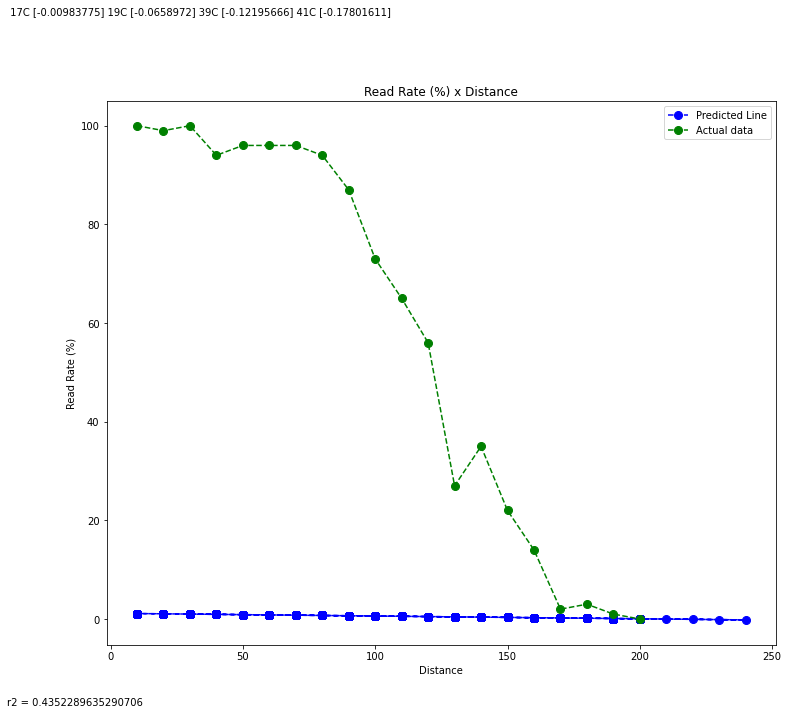

In [36]:
# plt.scatter(X_test, y_test, color='red')]
plt.figure(figsize=(12,10))
plt.plot(a1, y_pred, color='blue',marker='o',linestyle='dashed', markerfacecolor='blue', markersize=8)
plt.plot(sorted(df_temp['Distance'].unique()), all_rssi_rr_no_temp, linestyle='dashed', color='Green',marker='o', markerfacecolor='Green', markersize=8)
plt.title('Read Rate (%) x Distance')
plt.xlabel('Distance')
plt.ylabel('Read Rate (%)')
plt.legend(['Predicted Line', 'Actual data','Observation data'])
plt.figtext(.01, .04, "r2 = "+str(r2))
plt.figtext(.01, 1, " 17C " + str(y_pred1)+" 19C " + str(y_pred2)+" 39C " + str(y_pred3)
           +" 41C "+str(y_pred4))
plt.show()

